In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
from qutip import*

#defining some constants
#h = 4.135667696 eV.fs 
#E = hf = hcf/c = hcv where v is the frequency in wavenumber. This eq gives energy in eV from freq in 1/cm.
#c needs to be in cm/fs, c=299792458 m/s = 2.99792458E8 * E-15 * E2 cm/fs = 2.99792458E-5 cm/fs

h_0 = 4.135667696
c = 2.99792458E-5
h = h_0*c
vb_all_ref = [[14750, 14699, 14700], [14840, 14751, 14770], [14860, 14804, 
  14810], [14860, 14858, 14880], [14880, 14918, 14910], [14900, 14952, 14990], [14990, 14992, 15030], [15040, 15022, 
  15130], [15175, 15210, 15210], [15290, 15306, 15290], [15400, 15363, 15360], [15400, 15416, 15430], [15555, 15456, 
  15480], [15650, 15512, 15510]]
vb = []
for x in range(len(vb_all_ref)):
               vb.append(np.mean(vb_all_ref[x]))
t = pandas.read_csv('LHCII_couplings.csv')

In [15]:
t

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,36.0,-5.0,-3.0,1.0,-2.0,-3.0,3.0,4.0,-5.0,20.0,2.0,-8.0,2.0
1,0.0,0.0,15.0,6.0,0.0,5.0,6.0,-6.0,-24.0,-5.0,1.0,8.0,-2.0,0.0
2,0.0,0.0,0.0,-1.0,0.0,-4.0,6.0,4.0,72.0,7.0,-1.0,1.0,1.0,-5.0
3,0.0,0.0,0.0,0.0,4.0,71.0,24.0,-4.0,-2.0,0.0,-3.0,3.0,2.0,-3.0
4,0.0,0.0,0.0,0.0,0.0,9.0,-4.0,-4.0,0.0,1.0,1.0,-2.0,-1.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,16.0,-5.0,2.0,0.0,-2.0,2.0,2.0,-2.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.0,-5.0,1.0,-2.0,3.0,3.0,-3.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,43.0,5.0,-1.0,-2.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,4.0,-2.0,-2.0,2.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-26.0,13.0,6.0,-1.0


In [16]:
vc = (vb[0]+vb[13])/2 # setting the cav freq to mean of LHII freq range
print(vb[0], vc, vb[13])
nphoton = 2 # number of photons
n = nphoton+1 # dimension of hilbert space for sub-systems
all_ops = enr_destroy([n,n,n,n,n,n,n,n,n,n,n,n,n,n,n],excitations=nphoton)
a = all_ops[0]

g = 30 # cavity-site coupling freq in 1/cm
u = 50 # anharmonicity freq in 1/cm

14716.333333333334 15136.833333333334 15557.333333333334


In [17]:
H = h*vc*a.dag()*a   # cavity only
print(H)
# Now adding sites, cavity-site
for m in range(14):
    name='b'+str(m+1)
    print('adding site operators for ', name)
    b_op = all_ops[m+1]
    H = H + h*vb[m]*b_op.dag()*b_op + h*g*(a.dag()*b_op+a*b_op.dag())+h*u*(b_op.dag()*b_op.dag()*b_op*b_op)

    
# adding hopping between sites
for m in range(13):
    name1='b'+str(m+1)
    #print('first',name)
    b_op1 = all_ops[m+1]
    for k in range(m+1,14):
        name2 = 'b'+str(k+1)
        #print('second',name2)
        b_op2 = all_ops[k+1]
        #print('adding hopping between sites: ', name1, name2, ' hopping freq t= ', t.iat[m,k])
        H = H+ h*t.iat[m,k]*(b_op1.dag()*b_op2+b_op2.dag()*b_op1)
print('shape of hamiltonian is', H.shape)

Quantum object: dims = [[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]], shape = (136, 136), type = oper, isherm = True
Qobj data =
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.87672815 0.         0.        ]
 [0.         0.         0.         ... 0.         1.87672815 0.        ]
 [0.         0.         0.         ... 0.         0.         3.75345629]]
adding site operators for  b1
adding site operators for  b2
adding site operators for  b3
adding site operators for  b4
adding site operators for  b5
adding site operators for  b6
adding site operators for  b7
adding site operators for  b8
adding site operators for  b9
adding site operators for  b10
adding site operators for  b11
adding site operators for  b12
adding site ope

In [18]:
[energies,states] = H.eigenstates()
H = H.transform(states) # H is in polariton basis now
op_list = []
for k in range(15):
    op = all_ops[k]
    op = op.transform(states) # each operator is in polariton basis now
    op_list.append(op.dag()*op)
psi = enr_fock([n,n,n,n,n,n,n,n,n,n,n,n,n,n,n], 2, [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
psi_dm = psi*psi.dag()
psi_dm = psi_dm.transform(states) #density matrix is in polariton basis now
gamma = 0.1
c_ops = [gamma*a.transform(states)] # collaps operator is in polariton basis now. 

In [19]:
H

Quantum object: dims = [[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]], shape = (136, 136), type = oper, isherm = False
Qobj data =
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          1.82231449  0.         ...  0.          0.
   0.        ]
 [ 0.          0.          1.8335536  ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  3.85231107 -0.03392653
   0.02596292]
 [ 0.          0.          0.         ... -0.03387088  3.8586399
  -0.01510083]
 [ 0.          0.          0.         ...  0.02582959 -0.01504796
   3.87219602]]

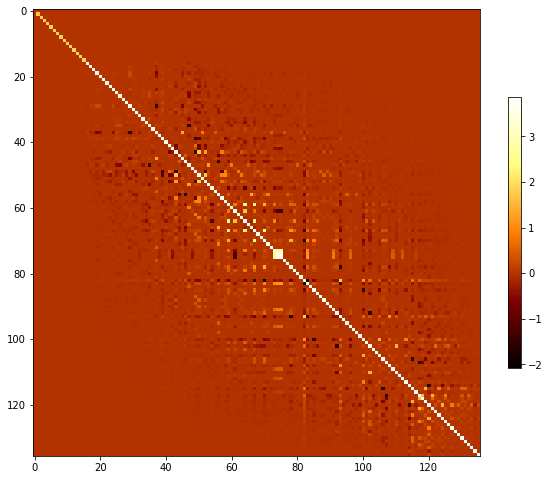

In [35]:
import matplotlib.animation as animation

import matplotlib.colors as mcolors


fig, ax = plt.subplots(figsize=(10, 10))

im = plt.imshow(np.real(H),cmap='afmhot')
plt.colorbar(shrink=0.5)
plt.show()

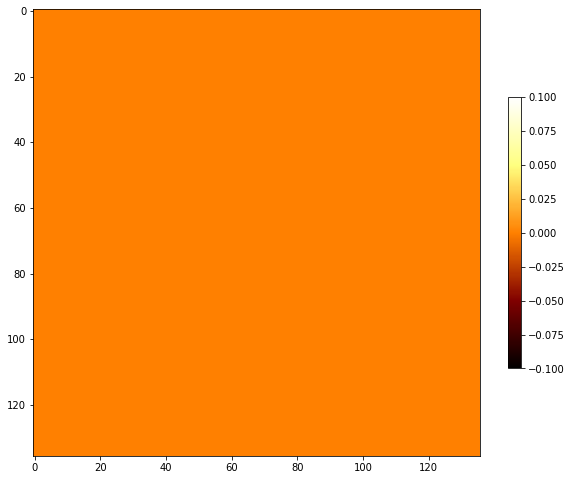

In [40]:
oo = all_ops[1]
fig, ax = plt.subplots(figsize=(10, 10))

im = plt.imshow(np.imag(all_ops[0].dag()*oo),cmap='afmhot')
plt.colorbar(shrink=0.5)
plt.show()

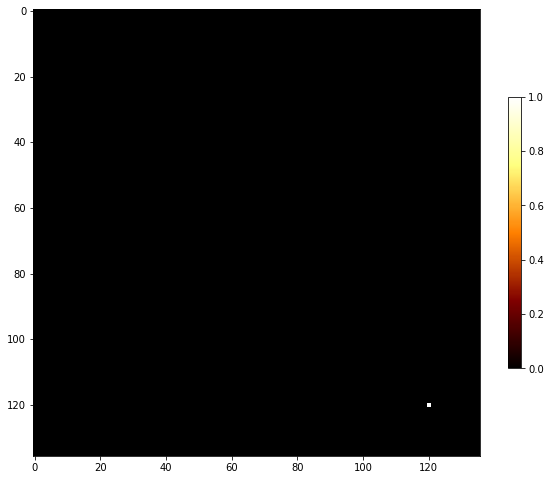

In [22]:

fig, ax = plt.subplots(figsize=(10, 10))

im = plt.imshow(np.abs(psi*psi.dag()),cmap='afmhot')
plt.colorbar(shrink=0.5)
plt.show()

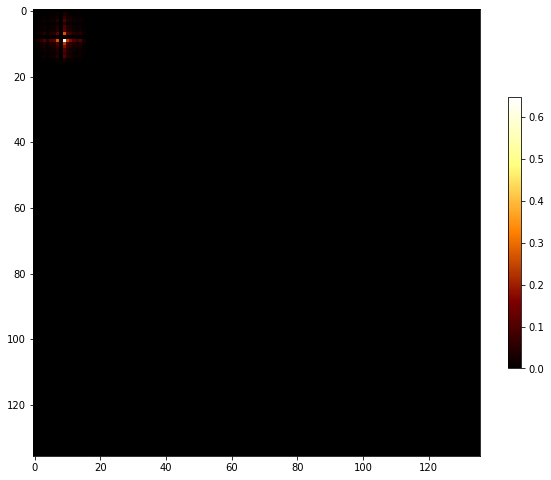

In [23]:

fig, ax = plt.subplots(figsize=(10, 10))

im = plt.imshow(np.abs(psi_dm),cmap='afmhot')
plt.colorbar(shrink=0.5)
plt.show()

In [24]:
tlist = np.linspace(0,4000,4000)
options = Options(store_states = True)
results = mesolve(H, psi_dm, tlist, c_ops, op_list,{},options)

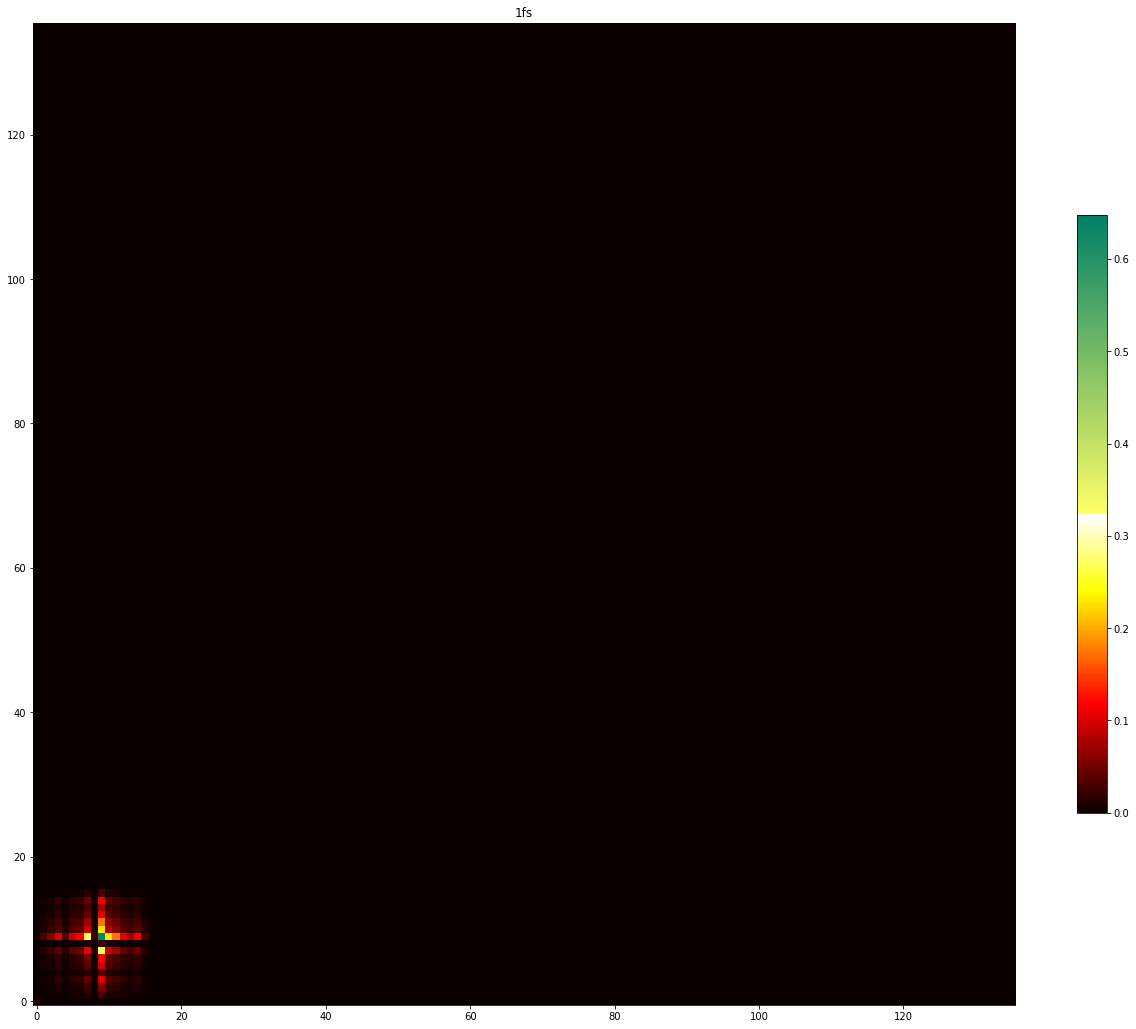

In [41]:
import matplotlib.animation as animation

import matplotlib.colors as mcolors


colors1 = plt.cm.hot(np.linspace(0, 1, 128))
colors2 = plt.cm.summer_r(np.linspace(0, 1, 128))

# combine them and build a new colormap
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

############
fig, ax = plt.subplots(figsize=(22, 22))

frame = 0
im = plt.imshow(np.abs(results.states[frame]), origin='lower',cmap=mymap)
plt.colorbar(shrink=0.5)


def update(*args):
    global frame

    im.set_array(np.abs(results.states[frame]))
    plt.title(str(frame)+'fs')

    frame += 1
    frame %= len(tlist)

    return im,

ani = animation.FuncAnimation(fig, update, len(tlist))
ani.save('1 photon nonleaky cavity will everything in polariton basis.mp4', fps = 200)

In [ ]:
[energies,states] = H.eigenstates()
polaritons = []
for x in range(len(tlist)):
    state = results.states[x]
    polaritons.append(state.transform(states))

In [ ]:
import matplotlib.animation as animation

import matplotlib.colors as mcolors


colors1 = plt.cm.hot(np.linspace(0, 1, 128))
colors2 = plt.cm.summer_r(np.linspace(0, 1, 128))

# combine them and build a new colormap
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

############
fig, ax = plt.subplots(figsize=(22, 22))

frame = 0
im = plt.imshow(np.abs(polaritons[frame]), origin='lower',cmap=mymap)
plt.colorbar(shrink=0.5)


def update(*args):
    global frame

    im.set_array(np.abs(polaritons[frame]))
    plt.title(str(frame)+'fs')

    frame += 1
    frame %= len(tlist)

    return im,

ani = animation.FuncAnimation(fig, update, len(tlist))
ani.save('cavity dynamics in polariton basis for non-coupling leaky cavity.mp4', fps = 200)

In [ ]:
import matplotlib.animation as animation

import matplotlib.colors as mcolors


colors1 = plt.cm.hot(np.linspace(0, 1, 128))
colors2 = plt.cm.summer_r(np.linspace(0, 1, 128))

# combine them and build a new colormap
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

############
fig, ax = plt.subplots(figsize=(22, 22))

frame = 0
im = plt.imshow(np.abs(results.states[frame]), origin='lower',cmap=mymap)
plt.colorbar(shrink=0.5)


def update(*args):
    global frame

    im.set_array(np.abs(results.states[frame]))
    plt.title(str(frame)+'fs')

    frame += 1
    frame %= len(tlist)

    return im,

ani = animation.FuncAnimation(fig, update, len(tlist))
ani.save('long time cavity dynamics in occupation number basis for non-leaky.mp4', fps = 200)


In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

frame = 1000
im = plt.imshow(np.abs(results.states[frame]), origin='lower',cmap='afmhot')
plt.colorbar(shrink=0.5)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

frame = 1200
im = plt.imshow(np.abs(results.states[frame]), origin='lower',cmap='afmhot')
plt.colorbar(shrink=0.5)
plt.show()

In [ ]:
plt.figure
plt.plot(tlist, results.expect[0])
plt.xlabel('time (fs)')
plt.ylabel('Average Number of Photons')
plt.legend(['Cavity'])
plt.title('Full LHII in Cavity')

In [ ]:
results.

In [ ]:
[energies, states] = H.eigenstates()
H.transform(states)

In [ ]:
#besides tensor product we can also use 'composite()'

In [43]:
nphoton_pop = results.expect[0]
G1 = correlation_2op_2t(H, psi*psi.dag(), None, tlist, c_ops, a.dag(), a)
g1 = G1 / np.sqrt(nphoton_pop[0] * nphoton_pop)

TypeError: Incompatible Qobj shapes

In [ ]:
plt.figure
plt.plot(tlist, np.real(g1),tlist, np.real(G1))
plt.xlabel('time (fs)')
plt.ylabel('g1')
plt.legend(['g1', 'G1'])
plt.title('First order optical coherence')

In [ ]:
[w,s] = spectrum_correlation_fft(tlist, g1)

In [ ]:
plt.figure
plt.plot(w,np.real(s))
plt.xlabel('angular freq (1/fs)')
plt.ylabel('Power')
plt.legend(['power', 'G1'])
plt.title('Power spectrum from g1')

In [ ]:
(2*np.pi)*0.453

In [ ]:
1875.5/(2*np.pi)

In [ ]:
G2 = correlation_4op_1t(H, psi, tlist, c_ops, a.dag(),a.dag(),a,a)
g2 = G2 / (nphoton_pop[0] * nphoton_pop)

In [ ]:
plt.figure
plt.plot(tlist, np.real(g2),tlist, np.real(G2))
plt.xlabel('time (fs)')
plt.ylabel('Amplitude')
plt.legend(['g2', 'G2'])
plt.title('Second order optical coherence')
#plt.savefig('g2 and G2 for empty cavity.png')

In [33]:
a = destroy(8)
a =  tensor(destroy(8),enr_identity([n,n,n,n,n,n,n,n,n,n,n,n,n,n],2))
a.shape

(960, 960)

In [ ]:
# Now testing second approach with coherent light
all_b_ops = enr_destroy([n,n,n,n,n,n,n,n,n,n,n,n,n,n],excitations=nphoton)

all_ops2 = [a]
for b in all_b_ops:
    all_ops2.append(tensor(qeye(8),b))
all_ops2[0].shape

In [ ]:
psi =  tensor(coherent(8,np.sqrt(2)),enr_fock([n,n,n,n,n,n,n,n,n,n,n,n,n,n], 2, [0,0,0,0,0,0,0,0,0,0,0,0,0,0]))
psi

In [ ]:
a*psi

In [ ]:
all_ops2[1]*psi

In [ ]:
g = 30 # cavity-site coupling freq in 1/cm
u = 50 # anharmonicity freq in 1/cm
H = h*vc*a.dag()*a   # cavity only

# Now adding sites, cavity-site
for m in range(14):
    name='b'+str(m+1)
    print('adding site operators for ', name)
    b_op = all_ops2[m+1]
    H = H + h*vb[m]*b_op.dag()*b_op + h*g*(a.dag()*b_op+a*b_op.dag())+h*u*(b_op.dag()*b_op.dag()*b_op*b_op)

    
# adding hopping between sites
for m in range(13):
    name1='b'+str(m+1)
    #print('first',name)
    b_op1 = all_ops2[m+1]
    for k in range(m+1,14):
        name2 = 'b'+str(k+1)
        #print('second',name2)
        b_op2 = all_ops2[k+1]
        #print('adding hopping between sites: ', name1, name2, ' hopping freq t= ', t.iat[m,k])
        H = H+ h*t.iat[m,k]*(b_op1.dag()*b_op2+b_op2.dag()*b_op1)
print('shape of hamiltonian is', H.shape)

In [ ]:
psi =  tensor(coherent(8,np.sqrt(2)),enr_fock([n,n,n,n,n,n,n,n,n,n,n,n,n,n], 2, [0,0,0,0,0,0,0,0,0,0,0,0,0,0]))
gamma = 0.0 #leakage rate
c_ops = [gamma*a]
op_list = [a.dag()*a]
for k in range(14):
    op = all_ops2[k+1]
    op_list.append(op.dag()*op)

tlist = np.linspace(0,4000,4000)
options = Options(store_states = True)
options.ntraj=100
results = mcsolve(H, psi, tlist, c_ops, op_list,options=options)
#options = Options(store_states = True)
#results = mesolve(H, psi*psi.dag(), tlist, c_ops, op_list,{},options)

In [ ]:
results.states

In [ ]:
[energies,states] = H.eigenstates()
polaritons = []
for x in range(len(tlist)):
    state = results.states[x]
    polaritons.append(state.transform(states))

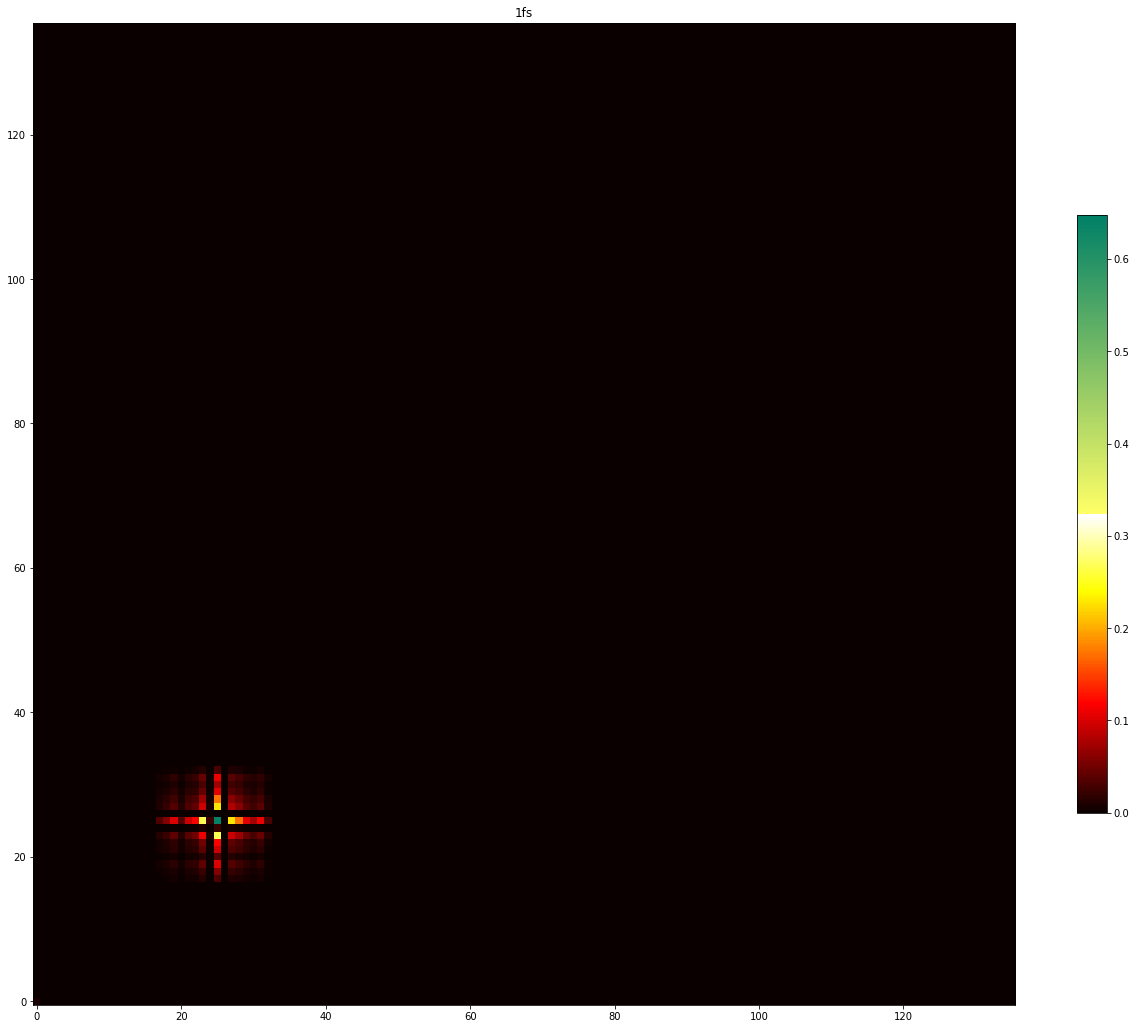

In [34]:
import matplotlib.animation as animation

import matplotlib.colors as mcolors


colors1 = plt.cm.hot(np.linspace(0, 1, 128))
colors2 = plt.cm.summer_r(np.linspace(0, 1, 128))

# combine them and build a new colormap
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

############
fig, ax = plt.subplots(figsize=(22, 22))

frame = 0
im = plt.imshow(np.abs(polaritons[frame]), origin='lower',cmap=mymap)
plt.colorbar(shrink=0.5)


def update(*args):
    global frame

    im.set_array(np.abs(polaritons[frame]))
    plt.title(str(frame)+'fs')

    frame += 1
    frame %= len(tlist)

    return im,

ani = animation.FuncAnimation(fig, update, len(tlist))
ani.save('Coherent light cavity dynamics in polariton basis.mp4', fps = 200)